# Part 1: Launch a Duet Server and upload data

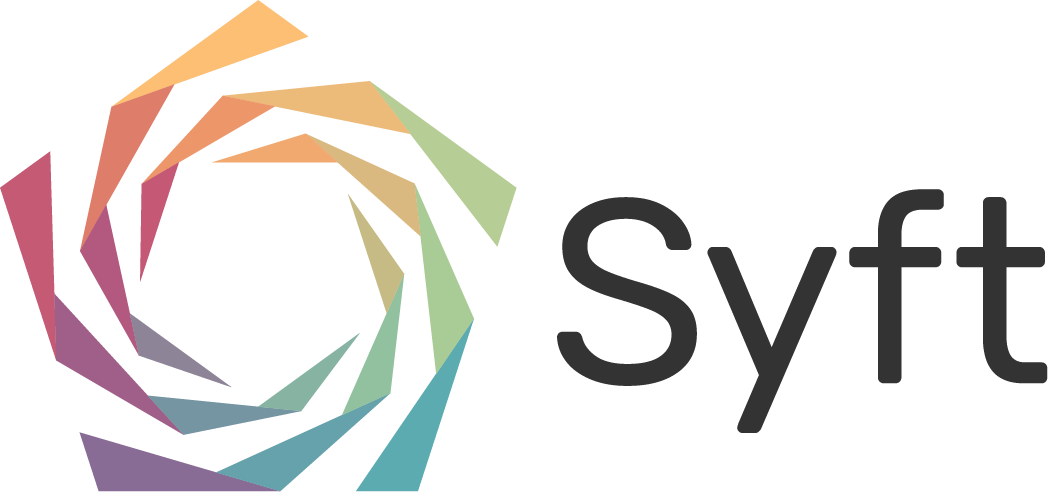

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ >
♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("306ada8cb04666eb5bf23d5b4ef4152d")

♫♫♫ > STEP 2: Running the code above will print out a 'Client ID'.
♫♫♫ >         Have your duet partner send it to you and enter it below!

Running loopback mode. Use sy.join_duet(loopback=True) on the other side.
♫♫♫ > Connecting...
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  -  Objects: 6  Requests: 0   Messages: 140                                                        > HANDLER Request : To evaluate training progress
Value: 139.4890899658203
♫♫♫ > DUET LIVE STATUS  *  Ob

In [1]:
import syft as sy
duet = sy.launch_duet(loopback=True)

In [2]:
import torch as th
import numpy as np

In [3]:
data = th.FloatTensor(np.array([5, 15, 25, 35, 45, 55]).reshape(-1, 1))

data = data.tag("DO1 data")
data = data.describe("Dataset of 6 samples, 1 feature")

data_ptr = data.send(duet, searchable=True)

In [4]:
duet.store.pandas

ID        Tags  \
0  <UID: 95b50c81d41f48f280bfb4ed88ff3c62>  [DO1 data]   

                       Description  
0  Dataset of 6 samples, 1 feature

In [5]:
data

tensor([[ 5.],
        [15.],
        [25.],
        [35.],
        [45.],
        [55.]])

In [6]:
duet.requests.add_handler(
    action="accept",
    print_local=True,  # print the result in your notebook
)

> HANDLER Request : To evaluate training progress
Value: 1050.6131591796875
> HANDLER Request : To evaluate training progress
Value: 833.8958129882812
> HANDLER Request : To evaluate training progress
Value: 643.0696411132812
> HANDLER Request : To evaluate training progress
Value: 478.4125671386719
> HANDLER Request : To evaluate training progress
Value: 339.91876220703125
> HANDLER Request : To evaluate training progress
Value: 227.21815490722656
> HANDLER Request : To evaluate training progress
Value: 32.8933219909668
> HANDLER Request : To evaluate training progress
Value: 9.448577880859375
> HANDLER Request :
Value: [Parameter containing:
tensor([[0.6305]], requires_grad=True), Parameter containing:
tensor([1.1781], requires_grad=True)]
> HANDLER Request :
Value: in_features=1, out_features=1, bias=True
> HANDLER Request :
Value: OrderedDict([('weight', tensor([[0.6305]])), ('bias', tensor([1.1781]))])
